In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#import data
df = pd.read_csv('../Datasets/AMD Historical Data.csv')

#print data 
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,11.43,11.42,11.65,11.02,55.18M,0.79%
1,1/4/2017,11.43,11.45,11.52,11.23,40.78M,0.00%
2,1/5/2017,11.24,11.43,11.69,11.23,38.86M,-1.66%
3,1/6/2017,11.32,11.29,11.49,11.11,34.45M,0.71%
4,1/9/2017,11.49,11.37,11.64,11.31,37.30M,1.50%


In [9]:
# Xem data 
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,11.43,11.42,11.65,11.02,55.18M,0.79%
1,1/4/2017,11.43,11.45,11.52,11.23,40.78M,0.00%
2,1/5/2017,11.24,11.43,11.69,11.23,38.86M,-1.66%
3,1/6/2017,11.32,11.29,11.49,11.11,34.45M,0.71%
4,1/9/2017,11.49,11.37,11.64,11.31,37.30M,1.50%
...,...,...,...,...,...,...,...
1606,5/22/2023,108.00,104.68,108.79,103.49,65.11M,2.06%
1607,5/23/2023,108.12,107.25,110.99,107.19,72.88M,0.11%
1608,5/24/2023,108.27,105.98,108.91,105.64,60.39M,0.14%
1609,5/25/2023,120.35,117.31,120.69,115.80,107.56M,11.16%


In [10]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [12]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [14]:
%pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/566.2 kB ? eta -:--:--
     --                                       30.7/566.2 kB ? eta -:--:--
     -------                                112.6/566.2 kB 1.3 MB/s eta 0:00:01
     ---------------                        225.3/566.2 kB 1.7 MB/s eta 0:00:01
     --------------------                   307.2/566.2 kB 1.6 MB/s eta 0:00:01
     ------------------------               368.6/566.2 kB 1.8 MB/s eta 0:00:01
     -------------------------------------  563.2/566.2 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 566.2/566.2 kB 2.0 MB/s eta 0:00:00
                                              0.0/988.4 kB ? eta -:--:--
     ------                                 174.1/988.4 kB 3.5 MB/s eta 0:00:01
     -----------                            307.2/988.4 kB 3.2 MB/s eta 0:00:01
     ---------------                        409.6/988.4 kB 2.8

In [16]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3974.827, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3995.355, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3982.070, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3983.702, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3995.795, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3981.437, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3981.466, Time=0.63 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3984.461, Time=1.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3984.485, Time=1.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3979.684, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3983.032, Time=0.69 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3982.545, Time=0.81 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3984.448, Time=0.29 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [18]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [19]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[85.82092399 86.19825243 86.03233515 86.22593327 86.27423342 86.26214594
 86.4757675  86.35931611 86.60862962 86.52067109 86.69145559 86.71196867
 86.7662578  86.8913455  86.86803515 87.0352772  87.00676105 87.14692752
 87.16860111 87.24698513 87.33036325 87.35703991 87.47529581 87.48703013
 87.60085827 87.63279186 87.71624994 87.78232121 87.83392954 87.92477754]


In [20]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 17.007666877088447
Testing RMSE: 26.705577257253083


Validation RMSE: 17.007666877088447
Testing RMSE: 26.705577257253083


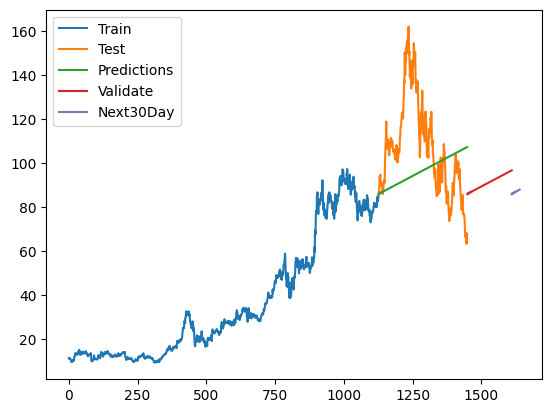

In [22]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1116, stop=1435, step=1)